<a href="https://colab.research.google.com/github/hamim23z/CSc47400/blob/main/CSC47400_HW1_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [51]:
#file path. just uploaded it on my google drive and then renamed it to get rid of whitespace
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Datasets/USFoods_AppendixB.xls"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#focusing on the time periods as listed on the problem1 description
time_periods = {
    "1994-98": "94-98 FAH",
    "2003-04": "03-04 FAH",
    "2005-06": "05-06 FAH",
    "2007-08": "07-08 FAH"
}

In [53]:
#extracting datafunction
def extract_data(sheet_name, gender="Men"):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

    col = 7 if gender == "Men" else 10
    df = df.iloc[70:130, [0, col]].dropna()
    df.columns = ["Product", gender]
    df["Product"] = df["Product"].astype(str).str.strip()
    df = df.set_index("Product")
    return df

#checking the data for each timeframe
men_data = pd.DataFrame({
    tp: extract_data(sheet, "Men")["Men"]
    for tp, sheet in time_periods.items()
})

women_data = pd.DataFrame({
    tp: extract_data(sheet, "Women")["Women"]
    for tp, sheet in time_periods.items()
})

print("Men Data (sample):")
print(men_data.head(15))
print("\nWomen Data (sample):")
print(women_data.head(15))

Men Data (sample):
                   1994-98 2003-04 2005-06 2007-08
Product                                           
Total fruit           86.2   85.97   87.58    87.2
Apples, Total        89.01   90.02   91.33   92.81
Apples as fruit      89.18   90.86    89.7   93.35
Apple juice          88.78   88.91      93   92.13
Bananas              95.42   94.85   95.59   93.96
Berries              84.21   88.57   91.83    90.7
Grapes               88.79   88.55   93.65   92.16
Melons               80.74   79.72   80.85   84.97
Oranges, Total       85.66   84.46      86   84.16
Oranges as fruit     92.31   94.62   94.49   92.17
Orange juice         85.15   83.92   85.52   83.49
Other citrus fruit   79.82   73.74   72.95    61.9
Stone fruit          88.95   94.02   93.05   95.89
Tropical fruit       74.61   74.58   76.94   84.68
Vegetables, Total    62.44   59.68   60.02   62.01

Women Data (sample):
                   1994-98 2003-04 2005-06 2007-08
Product                                  

In [54]:
#focusing on the fruit and dairy products. listed on the problem 1 description
fruit_products = [
    "Apples as fruit", "Bananas", "Berries", "Grapes", "Melons",
    "Oranges, Total", "Other citrus fruit", "Stone fruit", "Tropical fruit"
]

dairy_products = [
    "Fluid milk, Total", "Butter", "Cheese", "Yogurt", "Dairy, Other"
]

men_fruit = men_data.loc[fruit_products]
men_dairy = men_data.loc[dairy_products]
women_fruit = women_data.loc[fruit_products]
women_dairy = women_data.loc[dairy_products]

In [55]:
#calculating the percent change for the men and women. bc percentage multiply by 100
#also making sure it is just the fruit and dairy products. bc sheet has meat and flour and rice, etc.
men_change = ((men_data["2007-08"] - men_data["1994-98"]) / men_data["1994-98"]) * 100
women_change = ((women_data["2007-08"] - women_data["1994-98"]) / women_data["1994-98"]) * 100
men_change = men_change.loc[fruit_products + dairy_products]
women_change = women_change.loc[fruit_products + dairy_products]

In [56]:
#sorting here. i pick only fruits and dairy products and then sort them.
#i sort bc i tried it without and the graph looks weird. and i asked chatgpt how to fix it, and it said to sort them and it turned out to be a lot better.
men_fruit_sorted = men_change.loc[fruit_products].sort_values()
men_dairy_sorted = men_change.loc[dairy_products].sort_values()

women_fruit_sorted = women_change.loc[fruit_products].sort_values()
women_dairy_sorted = women_change.loc[dairy_products].sort_values()

#Here group the bars representing fruit products, and dairy products separately with a space between them
men_final = pd.concat([men_fruit_sorted, pd.Series([np.nan], index=[" "]), men_dairy_sorted])
women_final = pd.concat([women_fruit_sorted, pd.Series([np.nan], index=[" "]), women_dairy_sorted])

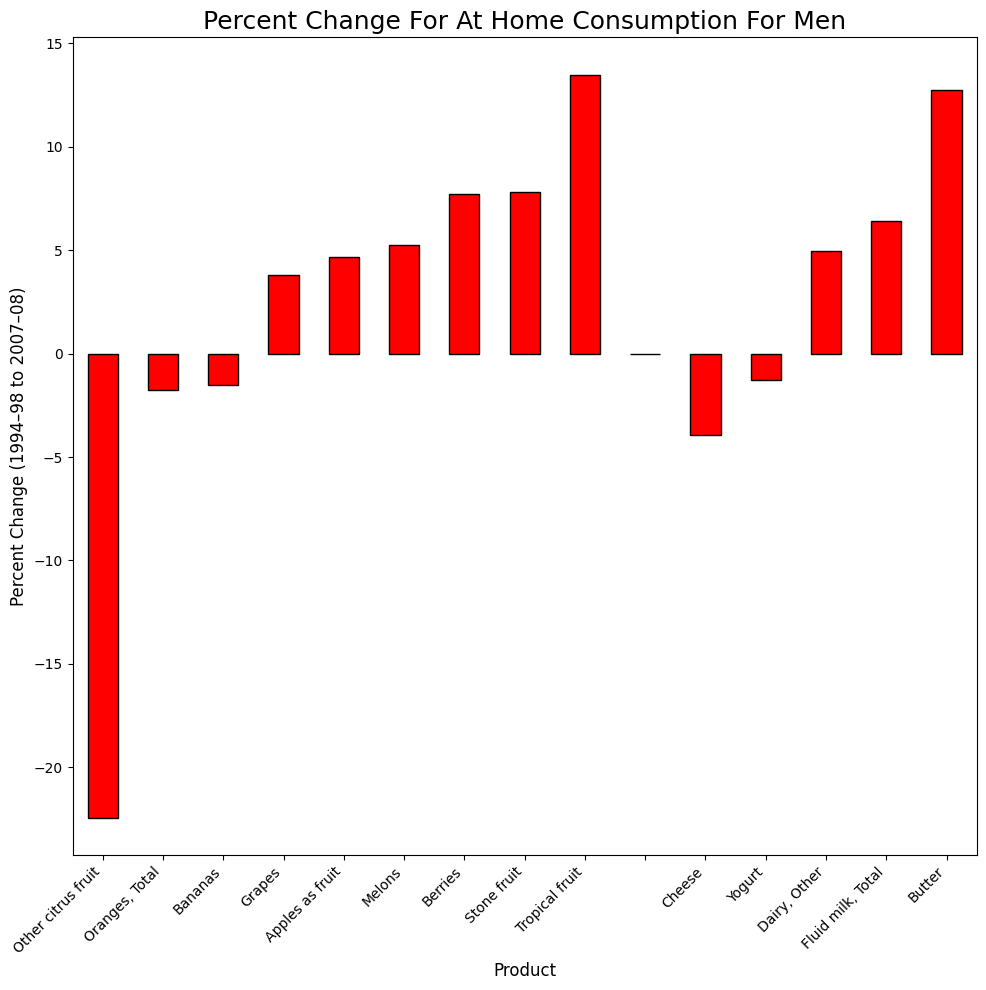

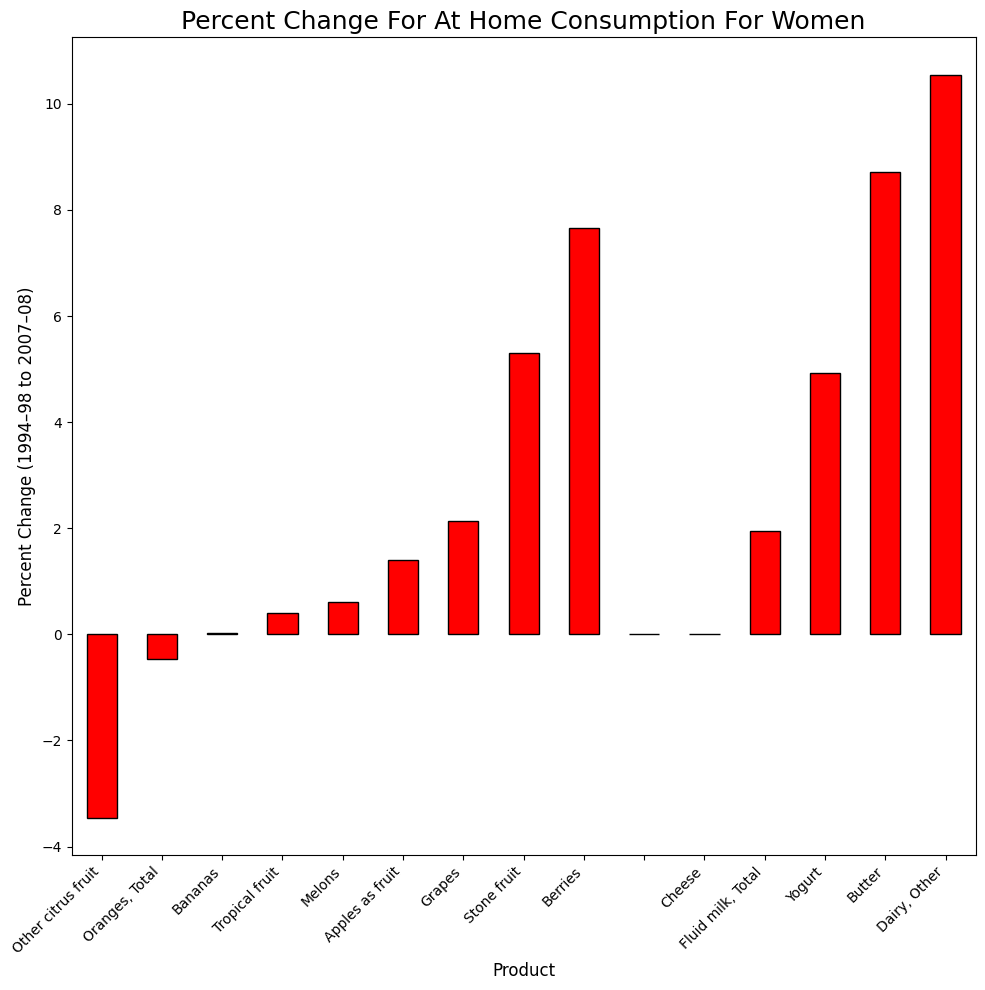

In [57]:
#setting up the plot components (labels, titles)
def plot_percent_change(data, title):
    ax = data.plot(kind="bar", color="red", edgecolor="black", figsize=(10,10))
    ax.set_title(title, fontsize=18)
    ax.set_ylabel("Percent Change (1994–98 to 2007–08)", fontsize=12)
    ax.set_xlabel("Product", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_percent_change(men_final, "Percent Change For At Home Consumption For Men")
print("\n\n")
print("\n\n")
plot_percent_change(women_final, "Percent Change For At Home Consumption For Women")